In [ ]:
#Setup
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import timeit

In [ ]:
#Data

#BT Thermal
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_BT_Heat_Rate.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_BT_Heat_Rate.csv'

#GF Immersion
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_Geroge_Fox_Immersion_Heat(KWh)_Rate.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_George_Fox_Immersion_Heat(KWh)_Rate.csv'

# Temperature
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_George_Fox_temp(DegC).csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_George_Fox_temp(DegC).csv'

#GF B27 Thermal
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_George_Fox_Thermal(KWh)_Rate.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_George_Fox_Thermal(KWh)_Rate.csv'

# BT Oc
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/BT_Oc_Train.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/BT_Oc_Test.csv'

# Library Oc
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Library_Train.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Library_Test.csv'

train = pd.read_csv(filepath1)
test = pd.read_csv(filepath2)
train.head()

,time,Associated Client Count
0,2018-08-20 00:00:00,33
1,2018-08-20 01:00:00,37
2,2018-08-20 02:00:00,38
3,2018-08-20 03:00:00,33
4,2018-08-20 04:00:00,36


In [ ]:
#Data Manipulation
train.columns = ['timestamp','reading']
test.columns = ['timestamp','reading']
train.timestamp = pd.to_datetime(train.timestamp)
test.timestamp = pd.to_datetime(test.timestamp)
train.set_index('timestamp', inplace=True)
test.set_index('timestamp', inplace=True)
#train = train.resample('1H').asfreq()
#test = test.resample('1H').asfreq()
#train = train.resample('1H').sum()
#test = test.resample('1H').sum()
test.dropna(inplace=True)
train.dropna(inplace=True)
train.tail()

,reading
timestamp,
2019-12-09 19:00:00,26992
2019-12-09 20:00:00,25062
2019-12-09 21:00:00,21944
2019-12-09 22:00:00,15728
2019-12-09 23:00:00,13128


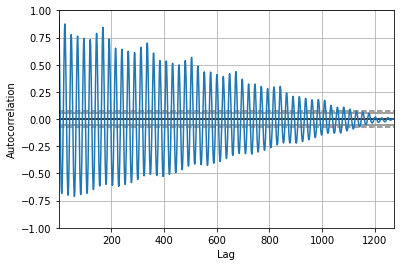

In [ ]:
autocorrelation_plot(train.iloc[0:])

In [ ]:
#ARIMA Parameters
p = 2
d = 0 
q = 0
P = 2
D = 0
Q = 1
m = 24
steps = 48 #Forecast steps

#Model Implementation
start = timeit.default_timer() #Time speed of training

model = ARIMA(train, order=(p,d,q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()

stop = timeit.default_timer() 
print('Time: ', stop - start) 

pred = model_fit.forecast(steps=steps) #Prediction step
plt.plot(pred)
plt.plot(test[:steps])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Time:  246.35713521700006


In [ ]:
#MAE
true = test[:steps]
true = np.array(true)
pred = np.array(pred)
true.shape = (-1, true.shape[0])
pred.shape = (-1, pred.shape[0])
mae = mean_absolute_error(true, pred)
mae

1.1678145338109138

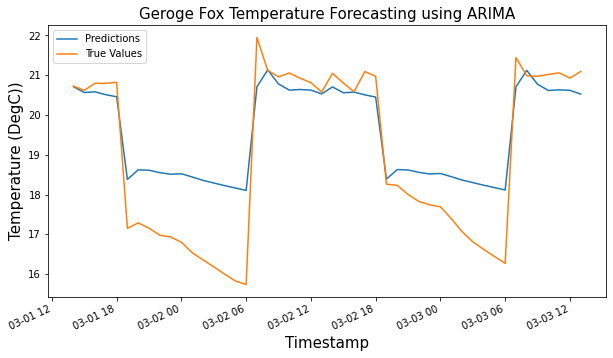

In [ ]:
#Visualisations
plt.figure(figsize=(10,5))
plt.plot(pred1, label='Predictions')
plt.plot(test[0:], label='True Values') #Test set selection for visualisation
plt.xticks(rotation=25, horizontalalignment='right')
plt.xlabel('Step', fontsize=15)
plt.ylabel('', fontsize = 15)
plt.title('', fontsize=15)
plt.legend()